In [1]:
import pandas as pd

In [2]:
# Load datasets
customers = pd.read_csv('Customers.csv')
products = pd.read_csv('Products.csv')
transactions = pd.read_csv('Transactions.csv')

In [3]:
# Inspect datasets
print(customers.head())
print(customers.info())

print(products.head())
print(products.info())

print(transactions.head())
print(transactions.info())

  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB
None
  ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      

In [4]:
print(customers.isnull().sum())
print(products.isnull().sum())
print(transactions.isnull().sum())

CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64
ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64
TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64


In [5]:
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])

In [6]:
customers = customers.drop_duplicates()
products = products.drop_duplicates()
transactions = transactions.drop_duplicates()

### EDA

In [7]:
region_distribution = customers['Region'].value_counts()
print(region_distribution)

Region
South America    59
Europe           50
North America    46
Asia             45
Name: count, dtype: int64


In [8]:
customers['SignupYear'] = customers['SignupDate'].dt.year
signup_trends = customers['SignupYear'].value_counts().sort_index()
print(signup_trends)

SignupYear
2022    64
2023    57
2024    79
Name: count, dtype: int64


In [9]:
category_distribution = products['Category'].value_counts()
print(category_distribution)

Category
Books          26
Electronics    26
Clothing       25
Home Decor     23
Name: count, dtype: int64


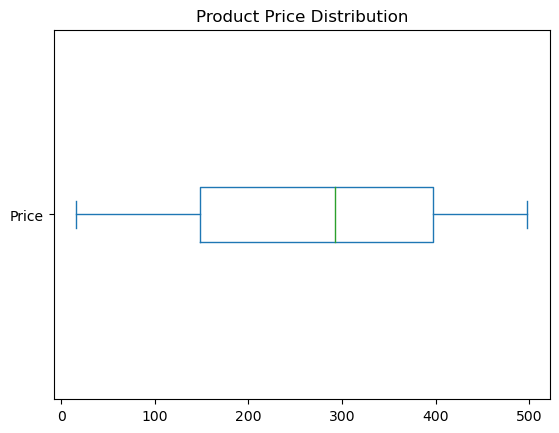

In [10]:
import matplotlib.pyplot as plt
products['Price'].plot(kind='box', vert=False, title='Product Price Distribution')
plt.show()

In [11]:
transactions['TransactionMonth'] = transactions['TransactionDate'].dt.to_period('M')
monthly_transactions = transactions['TransactionMonth'].value_counts().sort_index()
print(monthly_transactions)

TransactionMonth
2023-12      4
2024-01    107
2024-02     77
2024-03     80
2024-04     86
2024-05     86
2024-06     69
2024-07     96
2024-08     94
2024-09     96
2024-10     70
2024-11     57
2024-12     78
Freq: M, Name: count, dtype: int64


In [12]:
top_products = transactions.groupby('ProductID')['TotalValue'].sum().nlargest(5)
print(top_products)

ProductID
P029    19513.80
P079    17946.91
P048    17905.20
P020    15060.92
P062    14592.24
Name: TotalValue, dtype: float64


In [13]:
merged_data = transactions.merge(customers, on='CustomerID').merge(products, on='ProductID')
revenue_by_region = merged_data.groupby('Region')['TotalValue'].sum().sort_values(ascending=False)
print(revenue_by_region)

Region
South America    219352.56
Europe           166254.63
North America    152313.40
Asia             152074.97
Name: TotalValue, dtype: float64


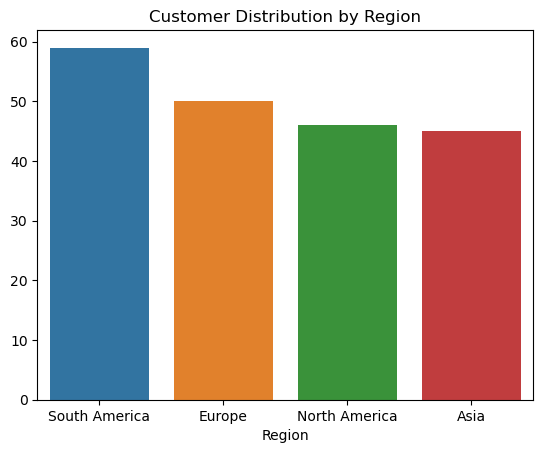

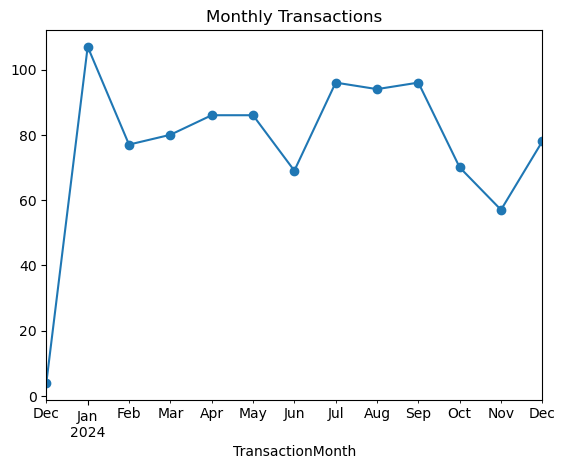

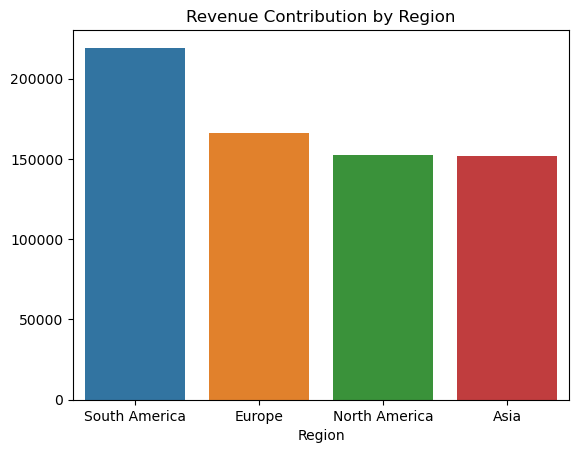

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Customers by region
sns.barplot(x=region_distribution.index, y=region_distribution.values)
plt.title('Customer Distribution by Region')
plt.show()

# Monthly transactions
monthly_transactions.plot(kind='line', marker='o', title='Monthly Transactions')
plt.show()

# Revenue by region
sns.barplot(x=revenue_by_region.index, y=revenue_by_region.values)
plt.title('Revenue Contribution by Region')
plt.show()